### Laboratório 1


In [77]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import scipy.linalg as la
import pickle

#### Variáveis aleatórias

Vamos usar principalmente as seguintes:

- rand - Variável aleatória distribuida uniformemente;
- randn - Variável aleatória gausiana com média nula e variancia 1 ($\mu = 0$ ; $\sigma = 1$);
- randint - Gera números inteiros aleatórios entre 2 limites especificados;

- permutation - Gera números inteiros aleatórios entre 2 limites especificados e baralha a lista. Útil quando recebemos dados ordenados e pretendemos treinar os algoritmos. 

- seed - Inicializa o gerador de números aleatórios para que possamos simular com números aleatórios, mas nas próximas iterações usar sempre os mesmos números aleatórios para treino, 

Exemplo (seed): </br>
    <b>NOTAS:</b> Cada vez que corro o script o x altera, porém o y, embora seja aleatório, mantém-se o mesmo devido ao seed anterior.  

In [10]:
x = rd.rand(1); 
print("Random sem seed: ", x)

rd.seed(42)
y = rd.rand(1)
print("Random com seed: ", y)

Random sem seed:  [0.95071431]
Random com seed:  [0.37454012]


Exemplo (geração de variáveis aleatórias 1D) </br>
Gerar pontos 1D segundo a distribuição de Wald e apresentar o seu histograma

(200,)
(201,)


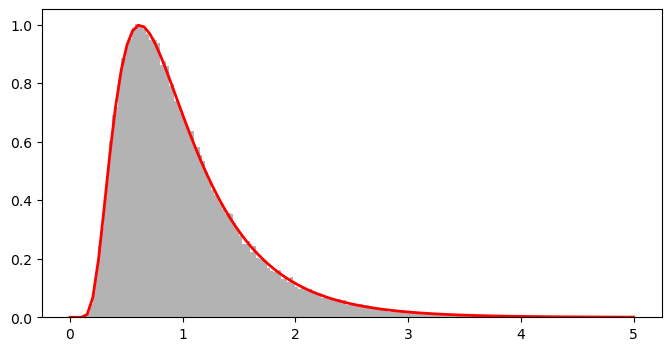

In [10]:
x = rd.wald(1, 3, int(100000))

hx, b = np.histogram(x, np.linspace(0, 5, 201), density=True)
print(hx.shape)
print(b.shape)

# array hx tem 200 amostras e array b(bins) tem 201 amostras. 
# O array b tem 201 amostras porque não indica o números de 
# intervalos, mas o número de limites dos intervalos, ou seja,
# [0, 200], logo tem 201 valores. 
# Assim, tenho que obter o valor intermédio de cada intervalo 
# para que consiga apresentar o histograma. 
# 1ºPego nos valores iniciais dos intervalos - b[1:]
# 2ºPego nos valores finais dos intervalor - b[:-1]
# 3ª Somo as duas ponto a ponto e divido por 2

b = (b[:-1] + b[1:])/2.

t = np.linspace(0.1e-6, 5, 100)

fx = np.sqrt(3/(2*np.pi*t**3))*np.exp(-3*(t-1)**2/(2*t))

plt.figure(figsize=(8, 4))
plt.bar(b, hx, width=0.025, color=[0.7,0.7, 0.7])
plt.plot(t, fx, 'r', linewidth=2)


Exercício 2 - Teorema do limite central </br>
A distribuição resultante de uma soma de um número suficientemente elevado de variáveis independentes tende para a distribuíção gausiana (normal), independentemente das distribuições adjacentes.

([<matplotlib.axis.XTick at 0x2b569fc2700>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

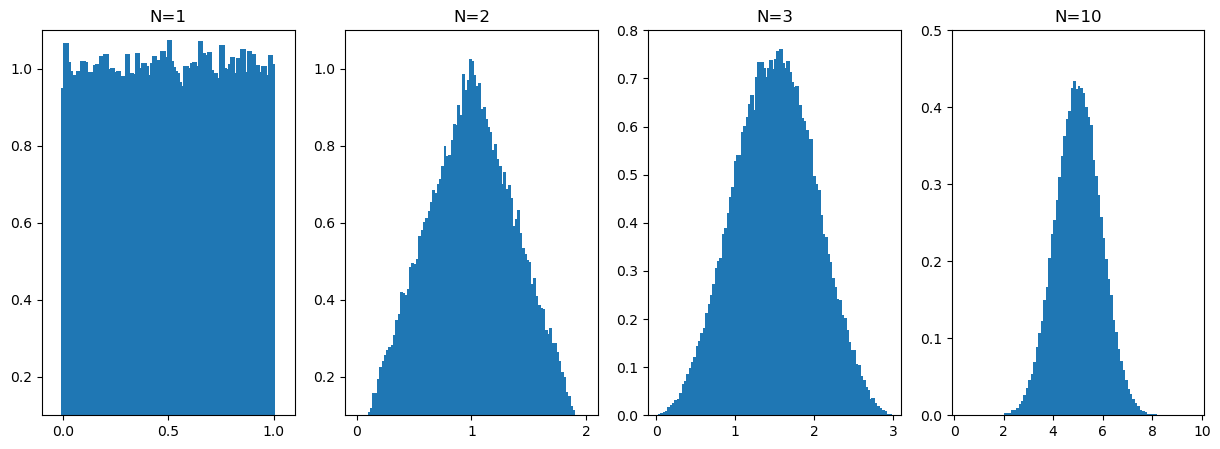

In [21]:
N = 100000

x1 = rd.rand(N)
x2 = np.sum(rd.rand(2, N), axis=0)
x3 = np.sum(rd.rand(3, N), axis=0)
x4 = np.sum(rd.rand(10, N), axis=0)

plt.figure(figsize=(15,5))

# histograma x1
hx, b = np.histogram(x1, np.linspace(0, 1, 101), density=True)
b = (b[1:] + b[:-1])/2.0
plt.subplot(141)
plt.axis([-0.1, 1.1, 0.1, 1.1])
plt.title('N=1')
plt.bar(b[0:100], hx, width=0.025)
plt.xticks([0, 0.5, 1])

# histograma x2
hx, b = np.histogram(x2, np.linspace(0, 2, 101), density=True)
b = (b[1:] + b[:-1])/2.0
plt.subplot(142)
plt.axis([-0.1, 2.1, 0.1, 1.1])
plt.title('N=2')
plt.bar(b[0:100], hx, width=0.025)
plt.xticks(np.arange(3))

# histograma x3
hx, b = np.histogram(x3, np.linspace(0, 3, 101), density=True)
b = (b[1:] + b[:-1])/2.0
plt.subplot(143)
plt.axis([-0.1, 3.1, 0, 0.8])
plt.title('N=3')
plt.bar(b[0:100], hx, width=0.05)
plt.xticks(np.arange(4))

# histograma x4
hx, b = np.histogram(x4, np.linspace(0, 10, 101), density=True)
b = (b[1:] + b[:-1])/2.0
plt.subplot(144)
plt.axis([-0.1, 10.1, 0, 0.5])
plt.title('N=10')
plt.bar(b[0:100], hx, width=0.1)
plt.xticks(np.arange(0, 11, 2))

## Exemplo 3 - Variáveis aleatórias gausianas

### Gausiana 1D:

Fórmula: </br>
$ p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{( -\frac{1}{2\sigma^2} (x - \mu)^2)}$

- Média ($\mu$) - Indica onde está centrada a gausiana (pico)
- Desvio padrão ($\sigma$) - Indica o quão larga e achatada é a gausiana

Considerações: </br>
- [$\mu - \sigma$; $\mu + \sigma$] = 68% dos dados da gausiana
- [$\mu - 2\sigma$; $\mu + 2\sigma$] = 95% dos dados da gausiana
- [$\mu - 3\sigma$; $\mu + 3\sigma$] = 99.7% dos dados da gausiana

- $\uparrow \sigma \rightarrow $ Curva mais larga e mais achatada
- $\downarrow \sigma \rightarrow $ Curva mais fina e com pico mais alto


### Gausiana ND: 

Fórmula: </br>
$ p(x) = \frac{1}{\sqrt{(2\pi)^d\left| \varepsilon \right|}} \exp{(-\frac{1}{2}(x-\mu)^T \varepsilon^{-1} (x-\mu)}$


Considerações: 
- Em vez de termos a variância (desvio padrão), passamos a ter uma matriz de covariância (dxd);
- Matriz de covariância é uma matriz quadrada e simétrica (diagonal de baixo é igual à diagonal de cima).

Text(0, 0.5, '$x_2$')

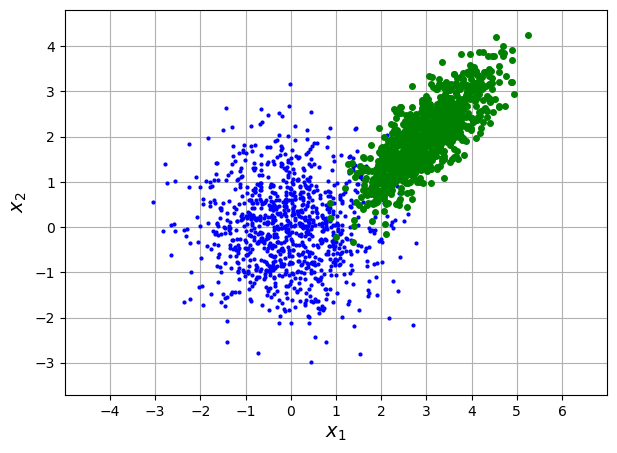

In [43]:
A = np.array([[1./3/np.sqrt(2.), 1./np.sqrt(2.)],
                [-1./3/np.sqrt(2.), 1./np.sqrt(2.)]])

b = np.array([3,2])

rd.seed(0)
x = rd.randn(2, 1000)

#y = (np.dot(A,x).T + b).T
y = np.dot(A,x) + b[:,np.newaxis]

plt.figure(figsize=(7,5))
plt.plot(x[0, :], x[1, :], '.b', markersize=4)
plt.plot(y[0, :], y[1, :], 'og', markersize=4)
plt.axis('equal')
plt.axis([-5., 7, -4., 5.1])
plt.grid()
plt.xticks(np.arange(-4, 7))
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

### Calcular covariância dos dados

Randn gera dados aleatórios com uma distribuição gausiana com $ \mu = 0 $ e $ \sigma = 1$. Em dados ND, como $ \sigma = 1 $, a matriz de covariancia seria a matriz identificade.

Como podemos ver abaixo, isto não acontece porque estamos a operar com dados discretos. Assim, quanto maior o número de amostras, maior a aproximação à estimação teórica. 

In [51]:
X = rd.randn(2, 1000)
print("Média: ", np.mean(X, axis=1))
print("Matriz covariancia: \n", np.cov(X))
print("\n")

X = rd.randn(2, 10000)
print("Média: \n", np.mean(X, axis=1))
print("Matriz covariancia: \n", np.cov(X))
print("\n")

X = rd.randn(2, 100000)
print("Média: \n", np.mean(X, axis=1))
print("Matriz covariancia: \n", np.cov(X))

Média:  [-0.00343739  0.0342248 ]
Matriz covariancia: 
 [[1.02381013 0.01669208]
 [0.01669208 1.09687454]]


Média: 
 [-0.00805662  0.00478011]
Matriz covariancia: 
 [[ 1.00137198 -0.01024304]
 [-0.01024304  0.99441322]]


Média: 
 [ 0.00062653 -0.0007679 ]
Matriz covariancia: 
 [[ 0.99753801 -0.00111256]
 [-0.00111256  0.99908154]]


### Alternativa para o cálculo da Matriz de Covariancia


In [76]:
# Cálculo da matriz de covariancia com vetor 1D
Yn = (X.T - np.mean(X, 1)).T
np.dot(Yn, Yn.T)/999.

# Cálculo da matriz de covariancia com vetor 2D
X = rd.randn(2, 1000)
Y = np.dot(A, X) + b[:,np.newaxis]
my = np.mean(Y, axis=1)
Yn = Y - my[:, np.newaxis]

Cov1 = np.cov(Yn)
Cov2 = np.dot(Yn, Yn.T)/(X.shape[1]-1)

print("Covariancia Numpy: \n", Cov1)
print("Covariancia calculada: \n", Cov2)


Covariancia Numpy: 
 [[0.55015738 0.43671478]
 [0.43671478 0.55722268]]
Covariancia calculada: 
 [[0.55015738 0.43671478]
 [0.43671478 0.55722268]]


### Segunda alternativa para cálculo da Matrix de Covariância

In [75]:
print(np.dot(A, A.T))

[[0.55555556 0.44444444]
 [0.44444444 0.55555556]]


### Gerar dados gausianos com uma dada média e uma dada variância

Text(0, 0.5, '$x_2$')

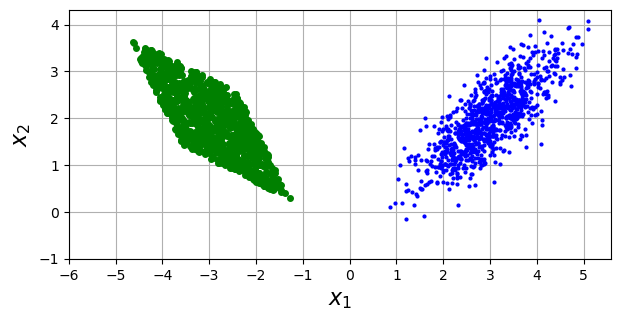

In [83]:
S1 = np.array([[5./9, 4./9.],[4./9, 5./9]])
m1 = np.array([3,2])

S2 = np.array([[5./9, -4/9.],[-4./9, 5./9]])
m2 = np.array([-3, 2])

# Crio 1000 pontos
N = 1000
np.random.seed(0)
# média = 0; desvio padrão = 1
X1 = rd.randn(2, N) 

# média = 1/2; desvio padrão = 1/12. 
# Preciso de ajustar para média = 0 e desvio padrão = 1
X2 = (rd.rand(2,N) - 0.5)*np.sqrt(12.) 

A1 = la.sqrtm(S1)
A2 = la.sqrtm(S2)

Y1 = (np.dot(A1, X1).T + m1).T
Y2 = (np.dot(A2, X2).T + m2).T

plt.figure(figsize=(7,4))
plt.plot(Y1[0,:], Y1[1,:], '.b', Y2[0,:], Y2[1,:], 'og', markersize=4)
plt.axis('scaled')
plt.grid()

plt.xticks(np.arange(-6, 6, 1))
plt.yticks(np.arange(-1, 5, 1))

plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)


Nota: Diferentes transformações poderão resultar na mesma matriz de covariância, como podemos ver abaixo

In [ ]:
#Ver exercício 04b

### Transformações lineares de dados 

(Text(0, 0.5, '$x_2$'),
 ([<matplotlib.axis.YTick at 0x2b56dd28040>,
  [Text(0, 0, ''),
   Text(0, 0, ''),
   Text(0, 0, ''),
   Text(0, 0, ''),
   Text(0, 0, '')]))

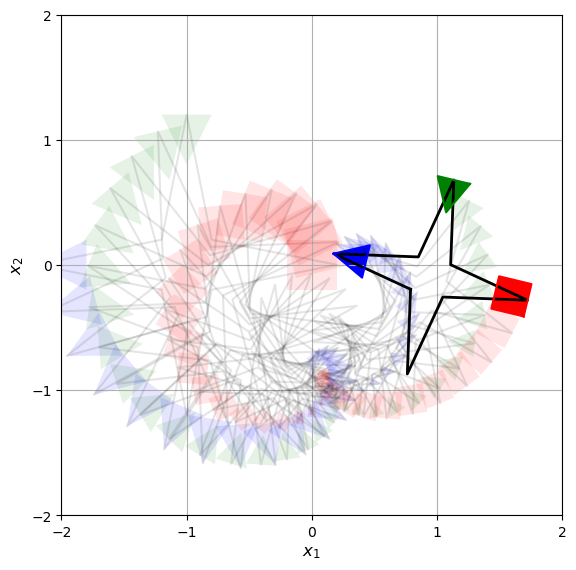

In [86]:
Parm = pickle.load(open('Material fornecido/L1AAestrela.p','rb'))#importar pontos
pts0=Parm[0];pts1=Parm[1];pts2=Parm[2];pts3=Parm[3]
N=40 #nª de transformações
ang=np.arange(-np.pi,2.*np.pi,3.*np.pi/N)
transl=np.zeros((2,N))
transl[0,:]=np.arange(-1,1,2./N);transl[1,:]=transl[0,:]**2-1
scl=(1.+np.cos(transl[0,:]*np.pi/2+np.pi/2))-.8#escalamento
plt.figure(figsize=(7,6.5))    #criar figura
idx=0;media=np.zeros((2,1))    #vector temporario
for a in ang:
    T=np.array([[np.cos(a),-np.sin(a)],[np.sin(a),np.cos(a)]])
    media[0,0]=transl[0,idx];media[1,0]=transl[1,idx]
    s=scl[idx]
    idx=idx+1
    x0=np.dot(T,s*pts0)+media;x1=np.dot(T,s*pts1)+media
    x2=np.dot(T,s*pts2)+media;x3=np.dot(T,s*pts3)+media
    plt.plot(x0[0,:],x0[1,:],'-k',alpha=.1)
    plt.fill(x1[0,:],x1[1,:],'b',x2[0,:],x2[1,:],'g',\
    x3[0,:],x3[1,:],'r',alpha=.1)
plt.plot(x0[0,:],x0[1,:],'-k',linewidth=2)
plt.plot(x1[0,:],x1[1,:],'b',x2[0,:],x2[1,:],'g',x3[0,:],x3[1,:],'r')
plt.fill(x1[0,:],x1[1,:],'b',x2[0,:],x2[1,:],'g',x3[0,:],x3[1,:],'r')
plt.axis('scaled'),plt.grid(True),
plt.axis(np.array([-1.,1.,-1.,1.])*2)
plt.xlabel('$x_1$',fontsize=12),plt.xticks(np.arange(-2,2.1))
plt.ylabel('$x_2$',fontsize=12),plt.yticks(np.arange(-2,2.1))
